In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [8]:
df.rename(columns={"Unnamed: 0":"Index"},inplace=True)
print(f"Data set has {df.shape[0]} row and {df.shape[1]} column")
df.head(10)

Data set has 30 row and 3 column


,Index,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [13]:
print(f"There are {df.duplicated().sum()} duplicate element in the dataset")
#checking duplicates and null element
print("null elements of dataset")
print(df.isnull().sum())

There are 0 duplicate element in the dataset
null elements of dataset
Index              0
YearsExperience    0
Salary             0
dtype: int64


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Index            30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [15]:
df.describe()

,Index,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


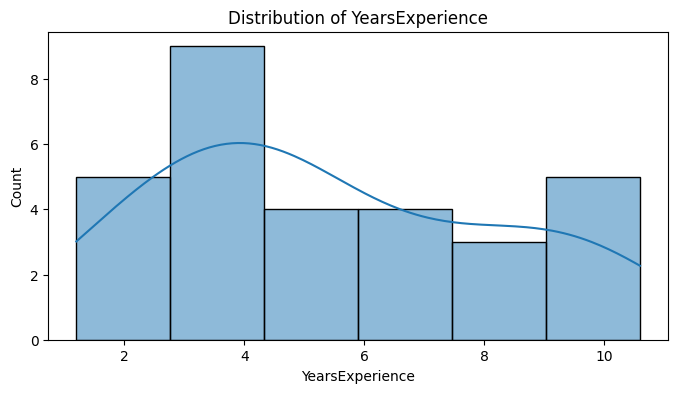

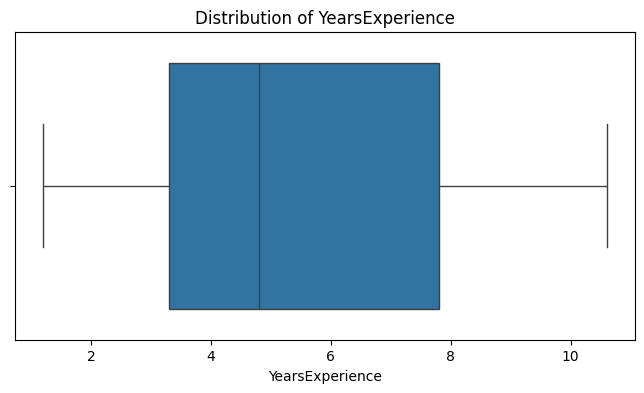

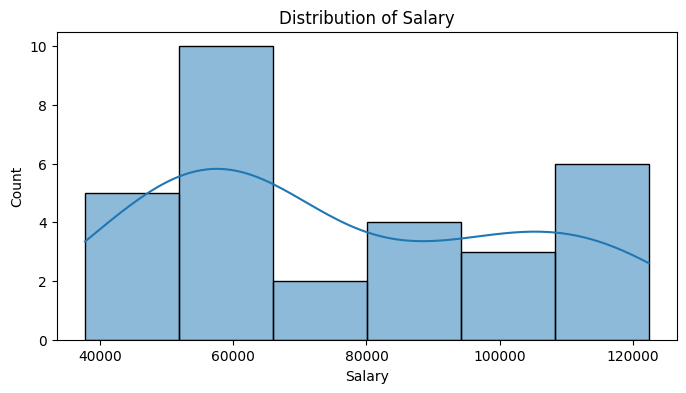

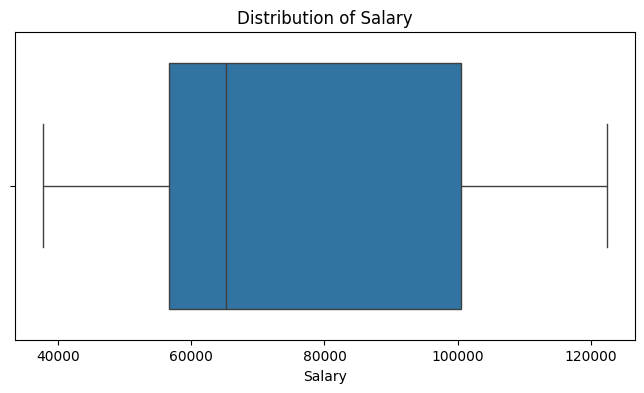

In [16]:
column = ['YearsExperience','Salary']
for col in column:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

In [ ]:
x = df['YearsExperience'].values #independent varaible
y = df['Salary'].values          #dependent variable

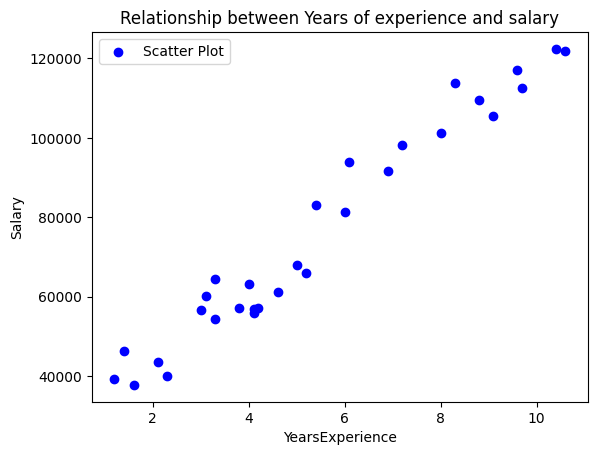

In [19]:
plt.scatter(x, y, color = 'blue', label='Scatter Plot')
plt.title('Relationship between Years of experience and salary')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.legend(loc=2)
plt.show()

In [20]:
#Checking the dimensionsons of x and y
print(x.shape)
print(y.shape)

(30,)
(30,)


In [25]:
#reshaping x and y
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [26]:
print(x.shape)
print(y.shape)

(30, 1)
(30, 1)


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.33, random_state=42)


In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(20, 1)
(20, 1)
(10, 1)
(10, 1)


In [29]:
#performing linear regression on the variables
from sklearn.linear_model import LinearRegression
L = LinearRegression()
L.fit(x_train,y_train)
y_pred = L.predict(x_test)


In [30]:
a = L.coef_
b = L.intercept_
print("Estimated model, a:",a)
print("Estimated model intercept, b:",b)

Estimated model, a: [[9426.03876907]]
Estimated model intercept, b: [24382.73150234]


In [ ]:
# Now we have the slope that is 9426.03876907 and intercept that is 24382.73150234
# Now the Equation is y = 24382.73150234*x + 24382.73150234

In [33]:
L.predict(x)[0:5]


array([[35693.97802523],
       [37579.18577904],
       [39464.39353286],
       [44177.41291739],
       [46062.62067121]])

In [36]:
#Performing RMSE to evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Rmse Value:{:.4f}".format(rmse))

Rmse Value:5941.5401


In [37]:
from sklearn.metrics import r2_score
print ("R2 Score value: {:.4f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.9553


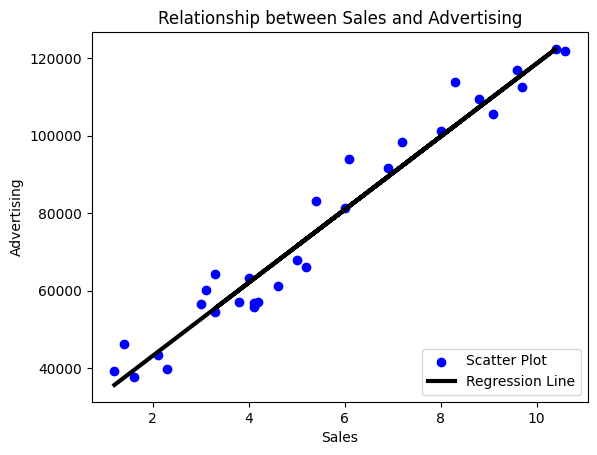

In [39]:
plt.scatter(x, y, color = 'blue', label='Scatter Plot')
plt.plot(x_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')
plt.title('Relationship between Sales and Advertising')
plt.xlabel('Sales')
plt.ylabel('Advertising')
plt.legend(loc=4)
plt.show()

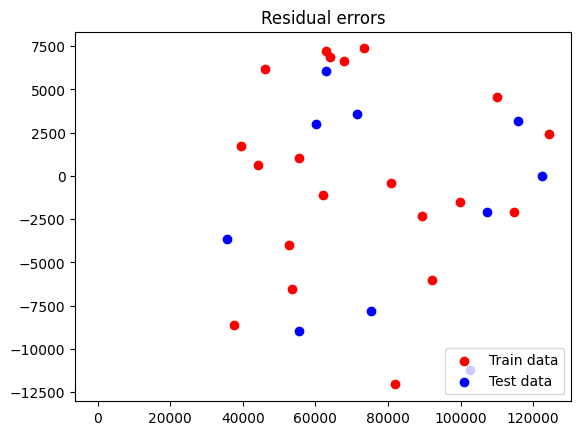

In [40]:
# Plotting residual errors

plt.scatter(L.predict(x_train), L.predict(x_train) - y_train, color = 'red', label = 'Train data')
plt.scatter(L.predict(x_test), L.predict(x_test) - y_test, color = 'blue', label = 'Test data')
plt.hlines(xmin = 0, xmax = 50, y = 0, linewidth = 3)
plt.title('Residual errors')
plt.legend(loc = 4)
plt.show()

In [41]:
# Checking for Overfitting or Underfitting the data

print("Training set score: {:.4f}".format(L.score(x_train,y_train)))

print("Test set score: {:.4f}".format(L.score(x_test,y_test)))

Training set score: 0.9549
Test set score: 0.9553
